In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## approach 1

### develop

In [2]:
def f_inversed(u, k, s):
    ln = np.log(1 / (1 - u))
    return (ln*k + ln + s**(k + 1)) ** (1/(k+1)) - s


def npp_1(n, k, seed=None):
    if seed is not None:
        np.random.seed(seed)

    t = np.zeros(n+1)
    for i in range(1, n+1):
        u = np.random.uniform()
        s = t[i-1]
        t[i] = t[i-1] + f_inversed(u, k, s)
    return t[1:]

### generate

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()


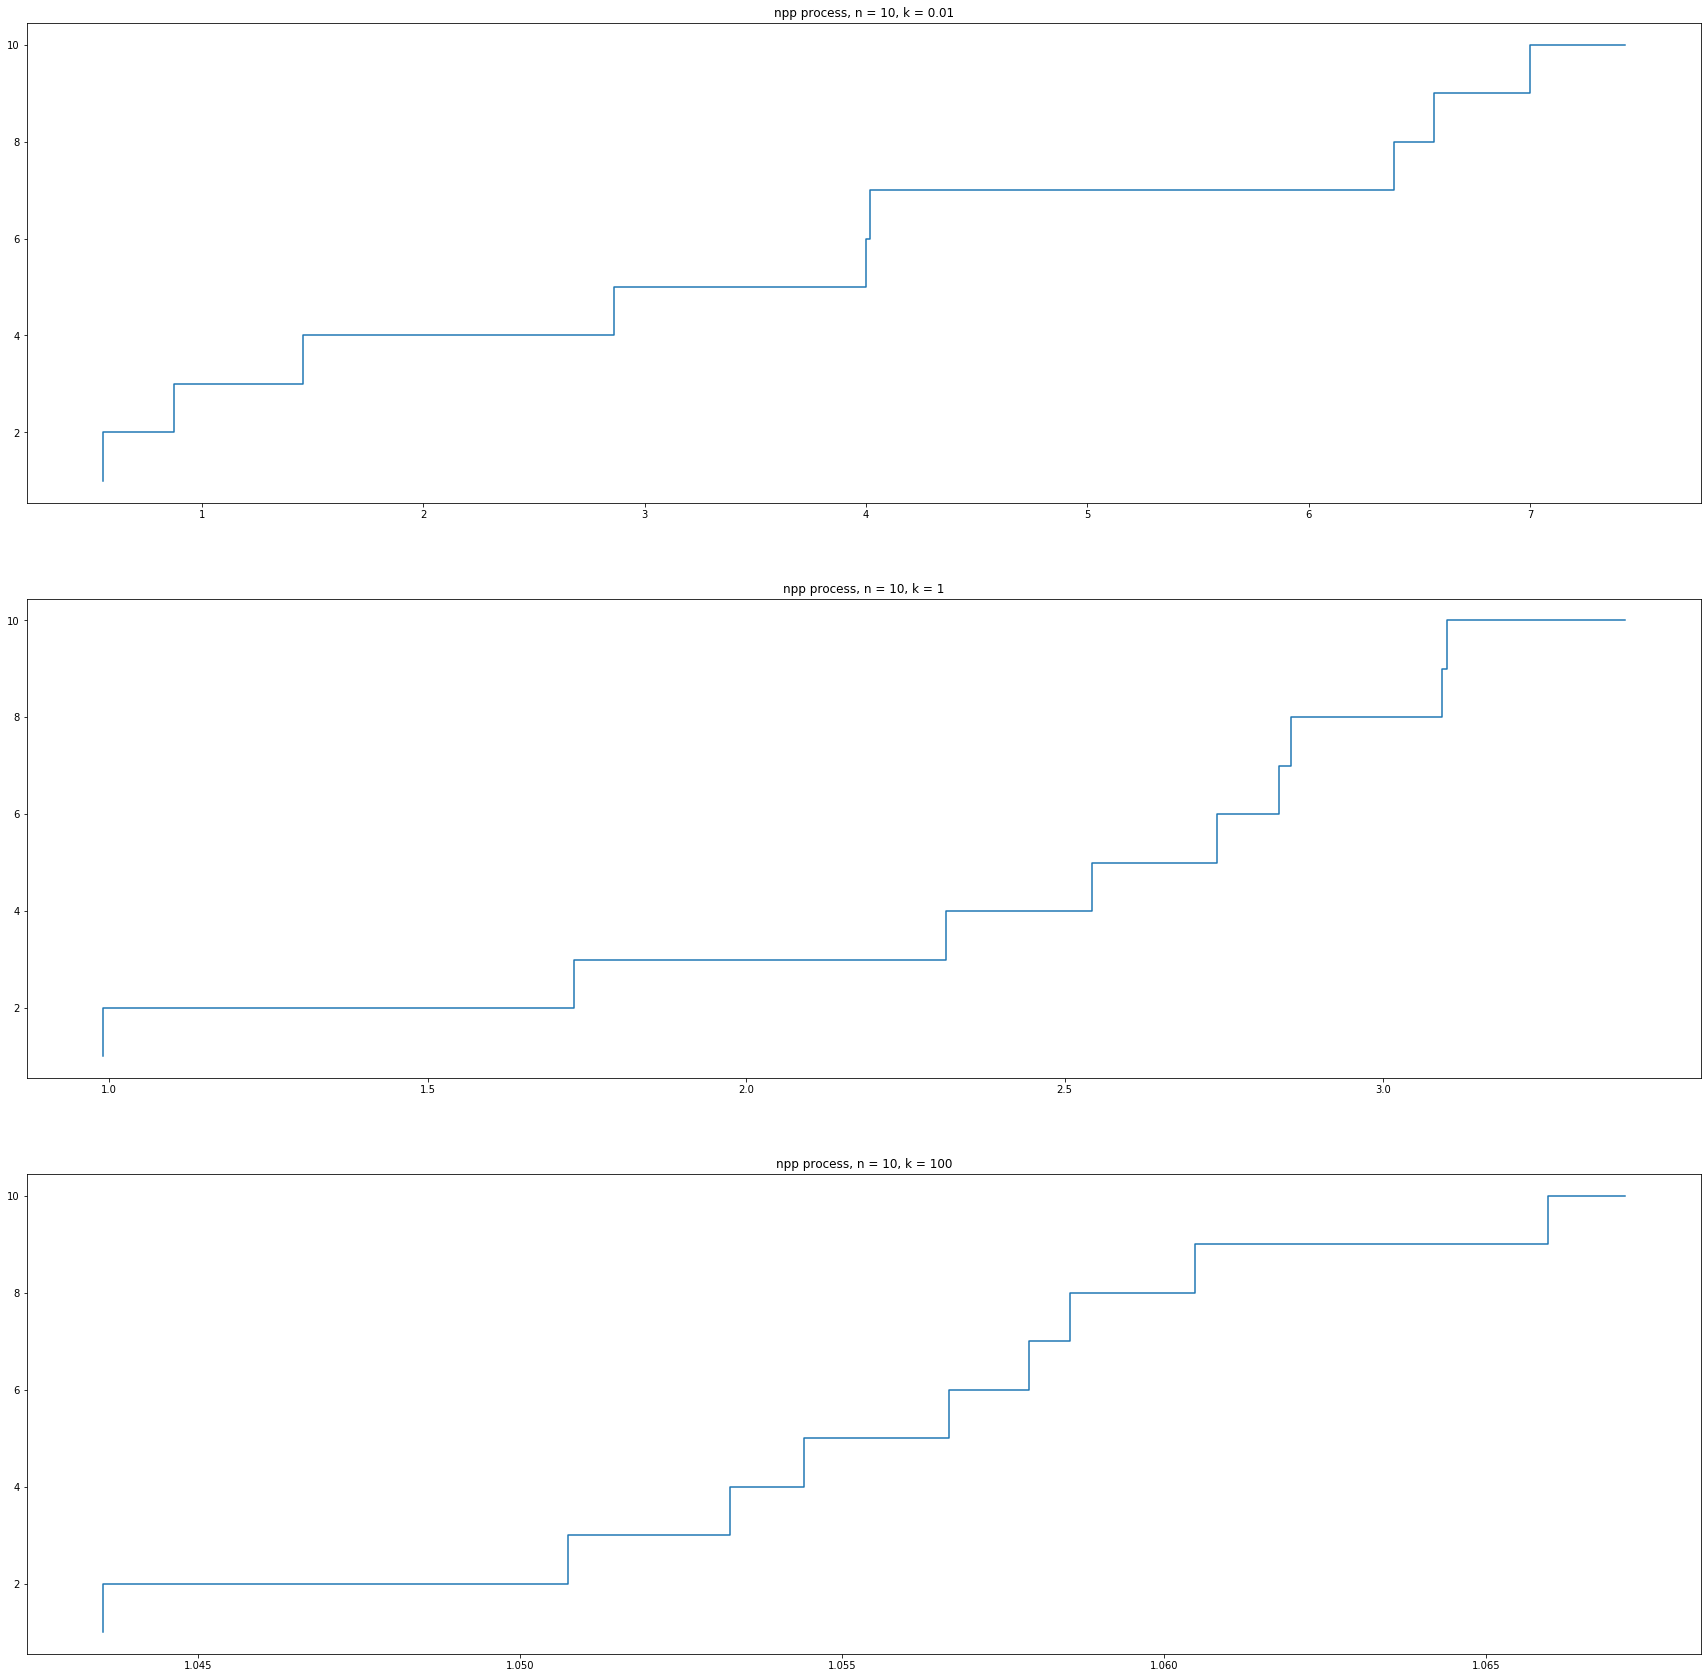

In [3]:
n = 10
m = 100
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(30,30))
for i, k in enumerate([1/m, 1, m]):
    jump_time = npp_1(n, k)
    jump_value = list(range(1, n+1))

    ax[i].step(jump_time, jump_value)
    ax[i].set_title(f"npp process, n = {n}, k = {k}")

fig.show()

### compare

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()


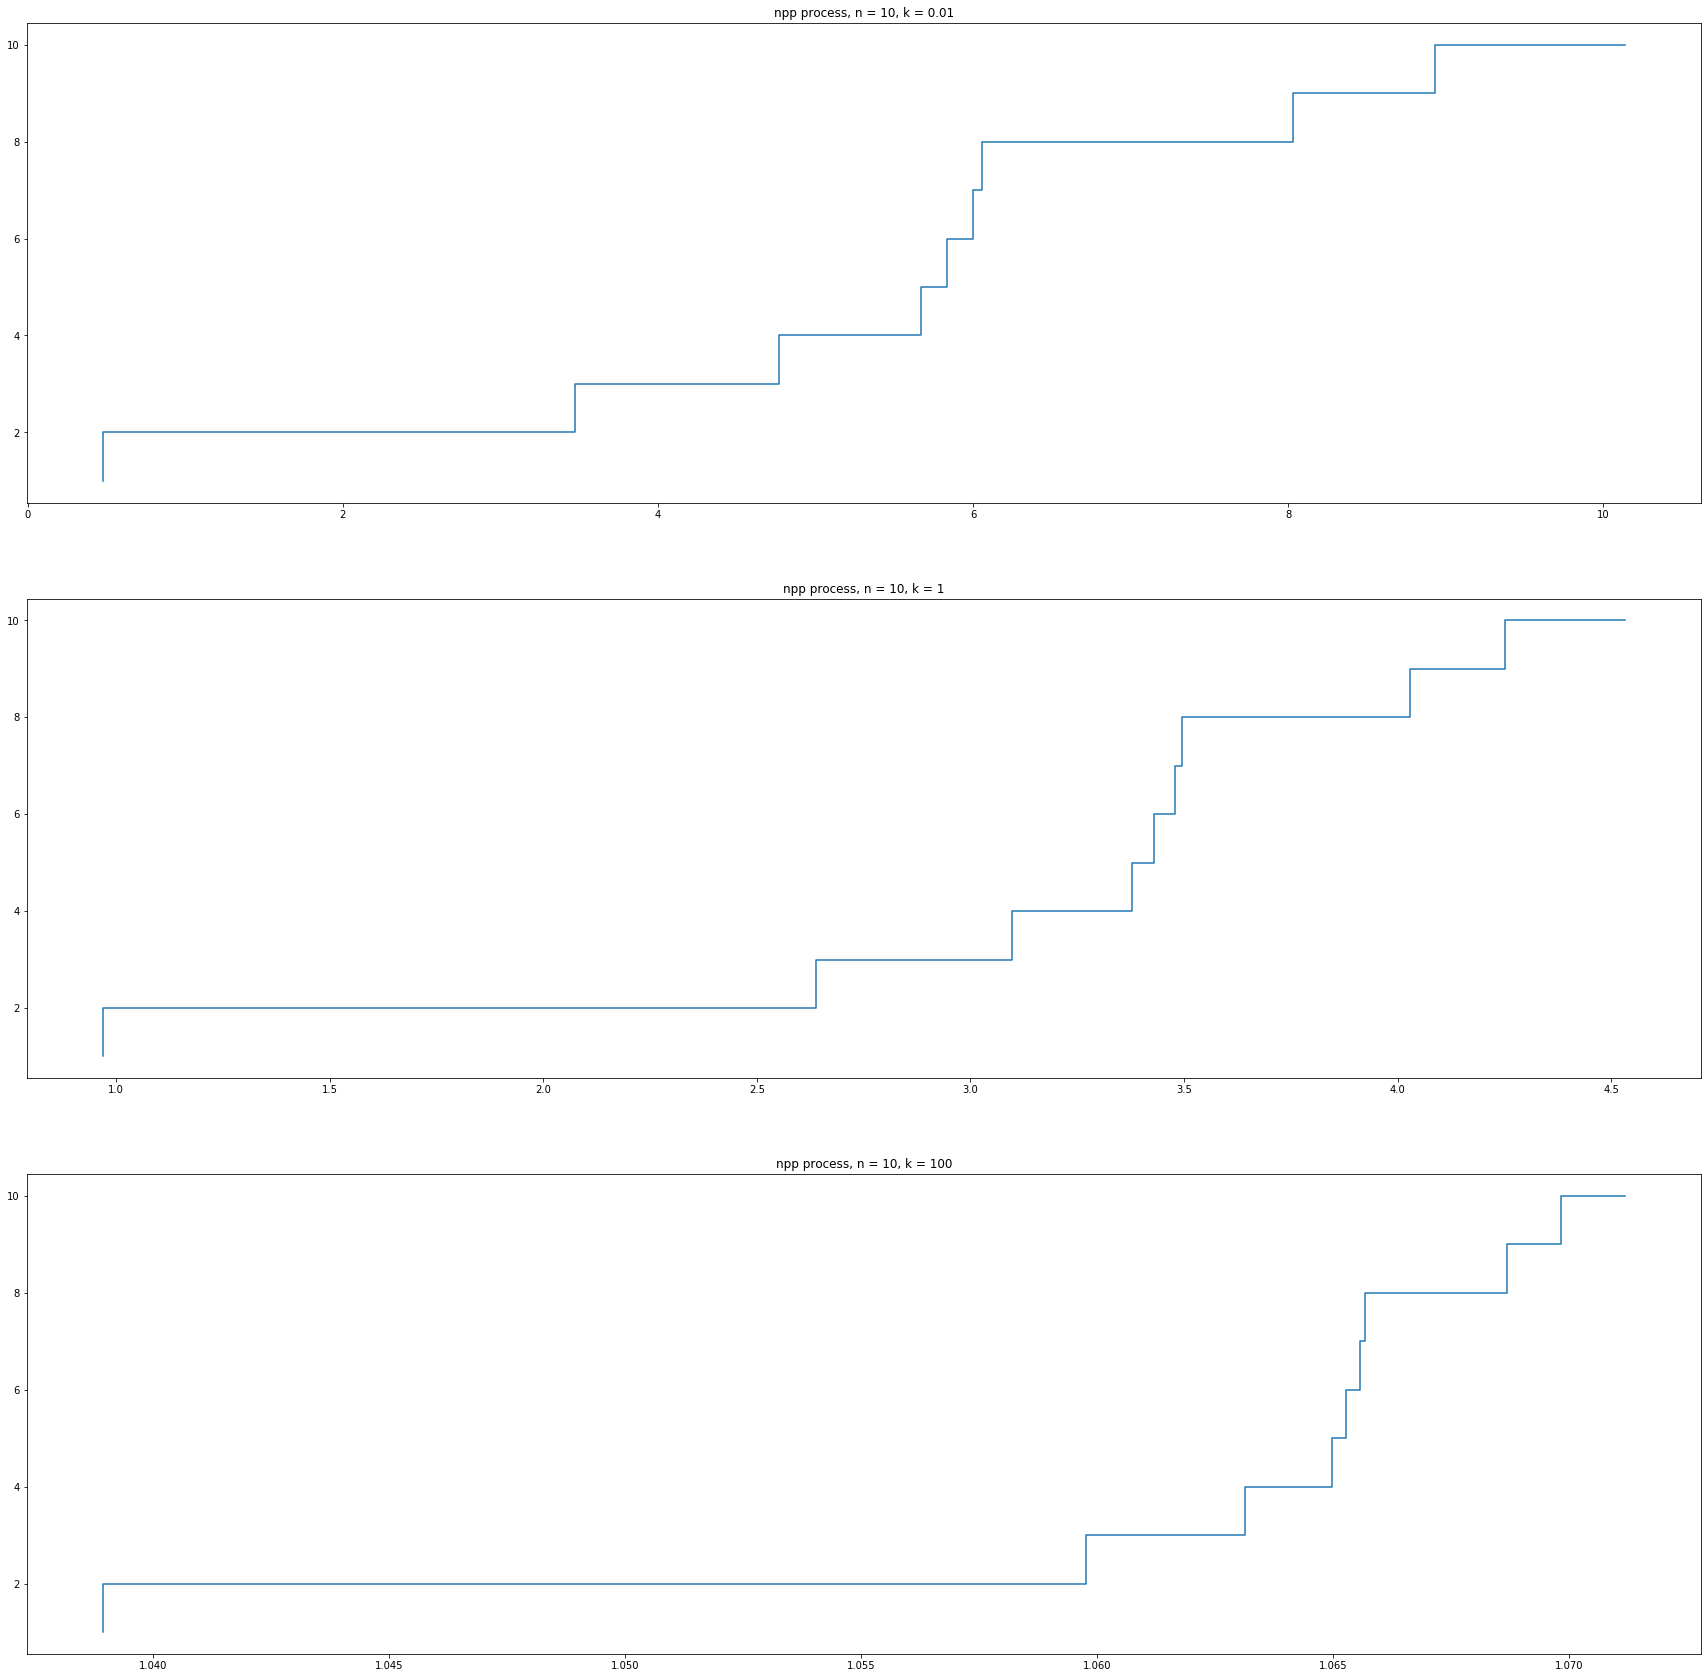

In [4]:
n = 10
m = 100
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(30,30))
for i, k in enumerate([1/m, 1, m]):
    jump_time = npp_1(n, k, seed=42)
    jump_value = list(range(1, n+1))

    ax[i].step(jump_time, jump_value)
    ax[i].set_title(f"npp process, n = {n}, k = {k}")

fig.show()

## approach 2

### develop

In [5]:
def generate_jumps(n, scale=1):
    t = []
    while len(t) < n:
        u = np.random.uniform()
        tau = -np.log(u) / scale
        t.append(tau)
    return np.cumsum(t)


def m_inversed(x, k):
    return np.exp(np.log(k * x + x) / (k + 1))


def npp_2(n, k, seed=None):
    if seed is not None:
        np.random.seed(seed)

    t = np.zeros(n)
    jumps = generate_jumps(n)
    for i in range(n):
        t[i] = m_inversed(jumps[i], k)
    return t

### generate

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()


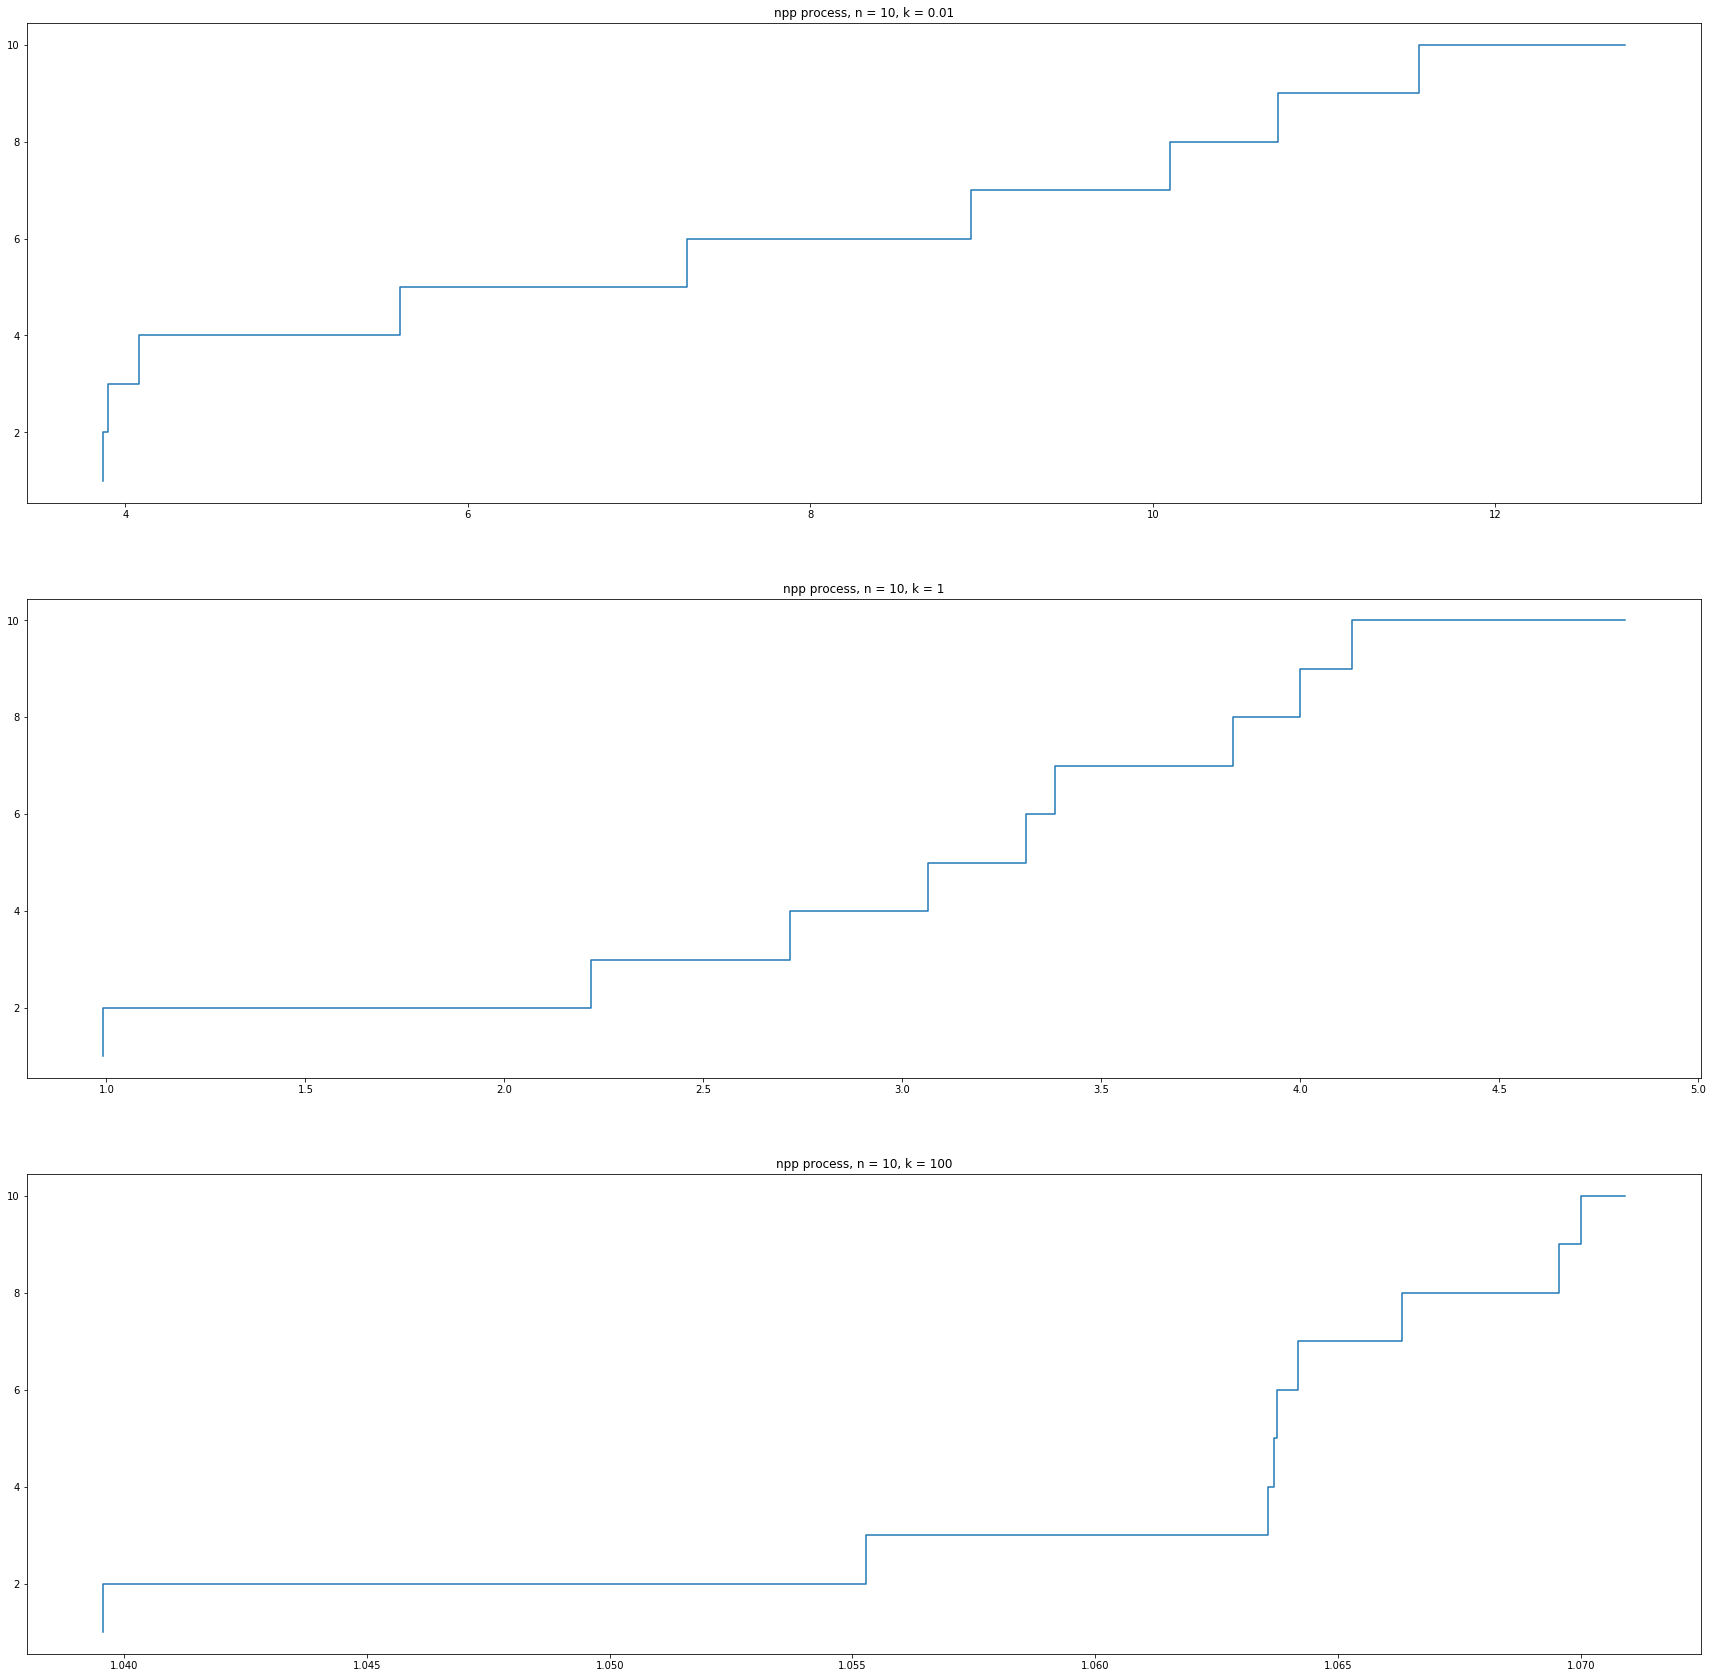

In [6]:
n = 10
m = 100
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(30,30))
for i, k in enumerate([1/m, 1, m]):
    jump_time = npp_2(n, k)
    jump_value = list(range(1, n+1))

    ax[i].step(jump_time, jump_value)
    ax[i].set_title(f"npp process, n = {n}, k = {k}")

fig.show()

### compare

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()


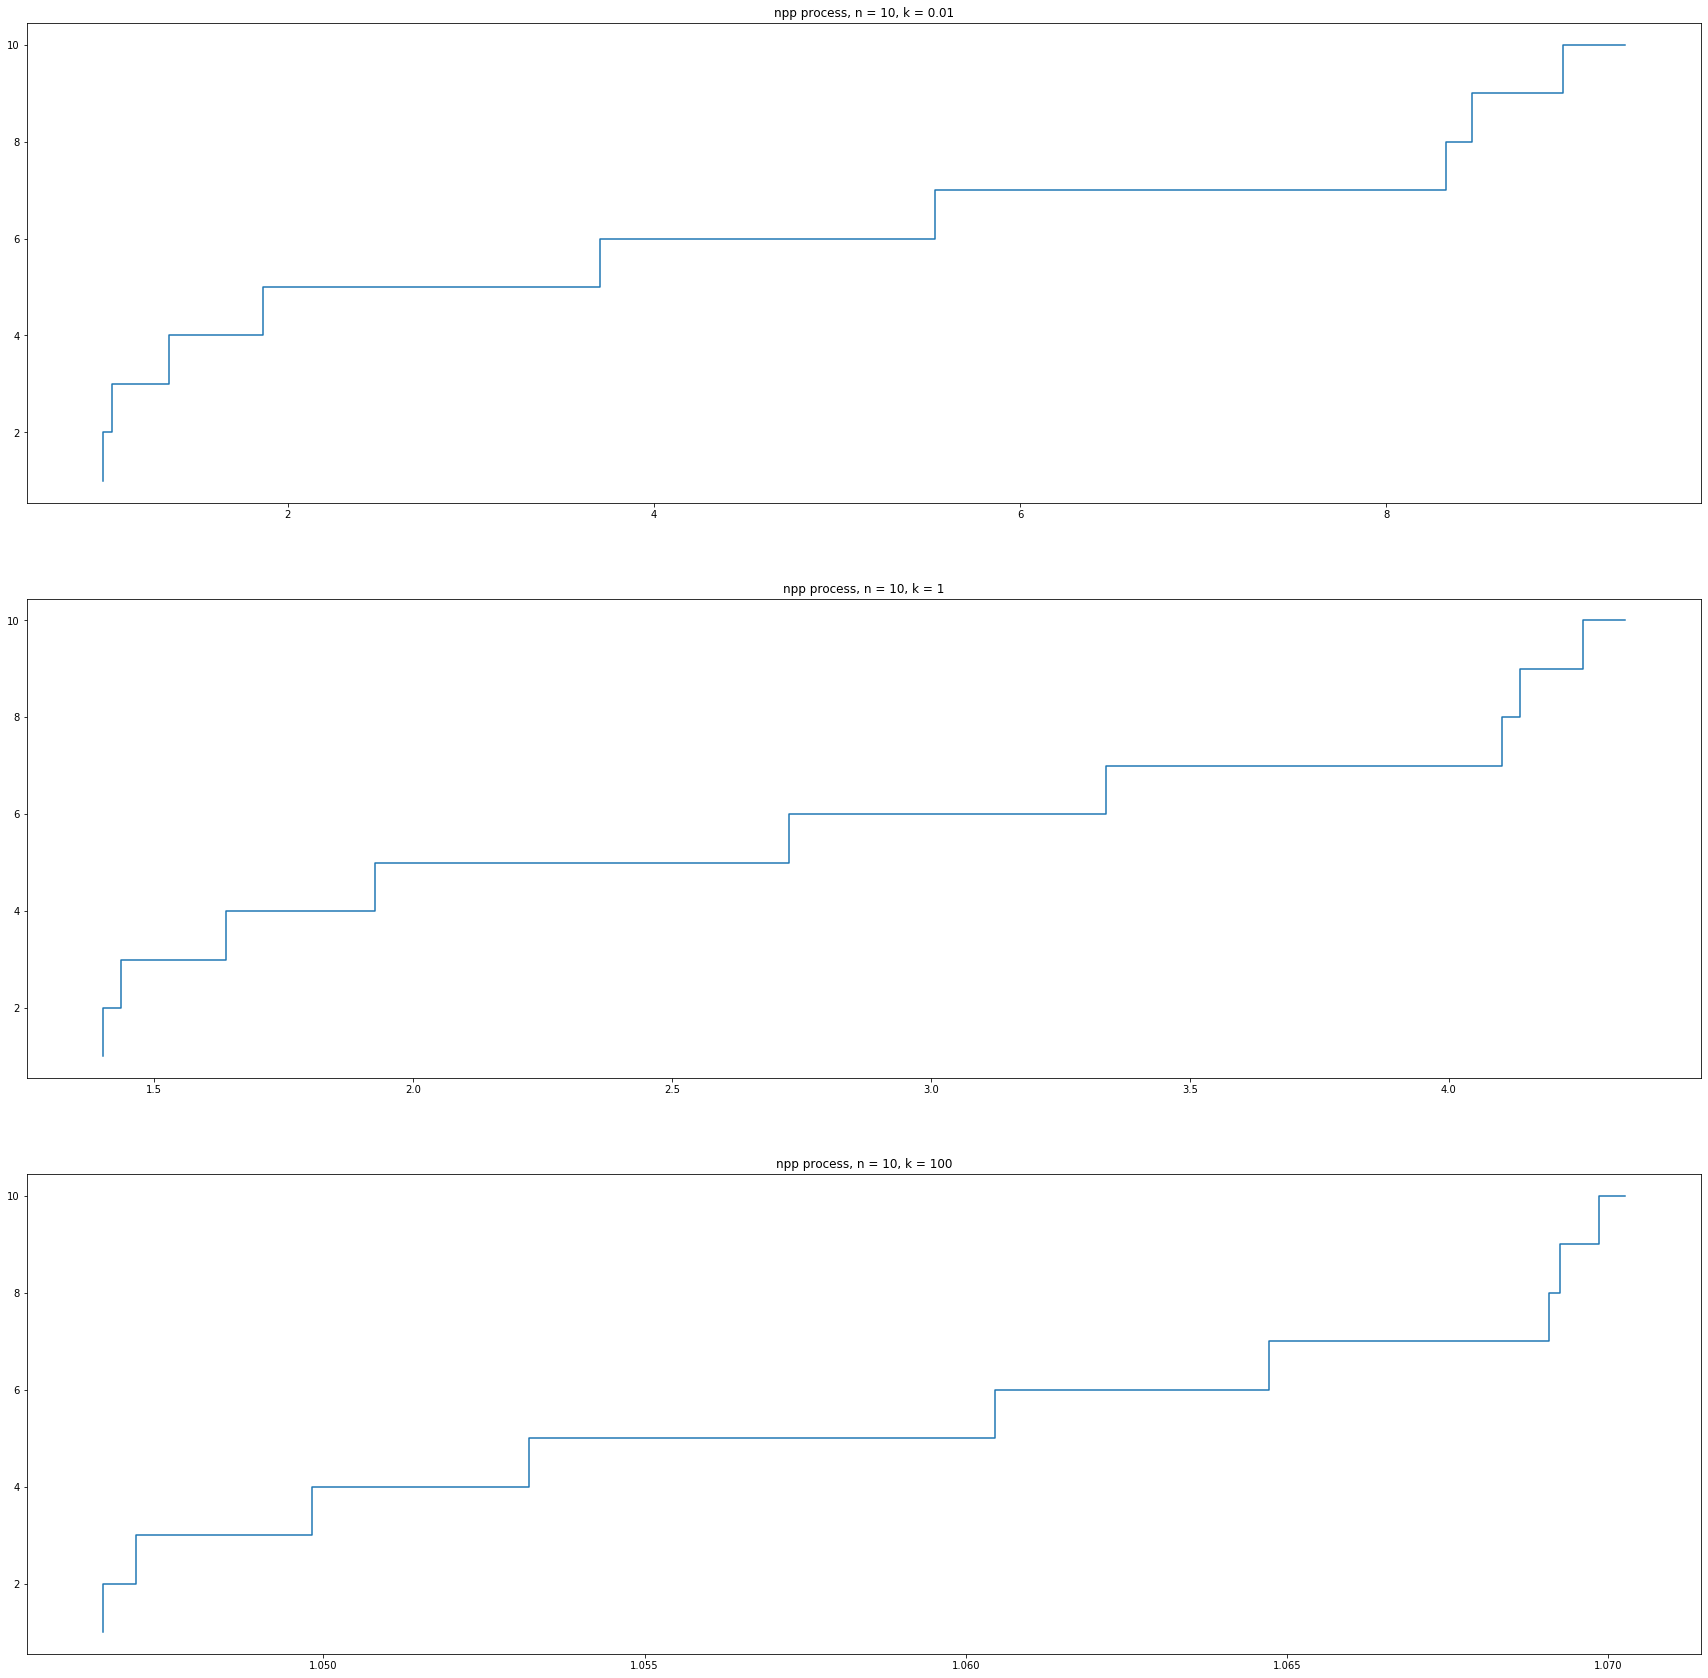

In [7]:
n = 10
m = 100
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(30,30))
for i, k in enumerate([1/m, 1, m]):
    jump_time = npp_2(n, k, seed=42)
    jump_value = list(range(1, n+1))

    ax[i].step(jump_time, jump_value)
    ax[i].set_title(f"npp process, n = {n}, k = {k}")

fig.show()

## compare approaches

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()


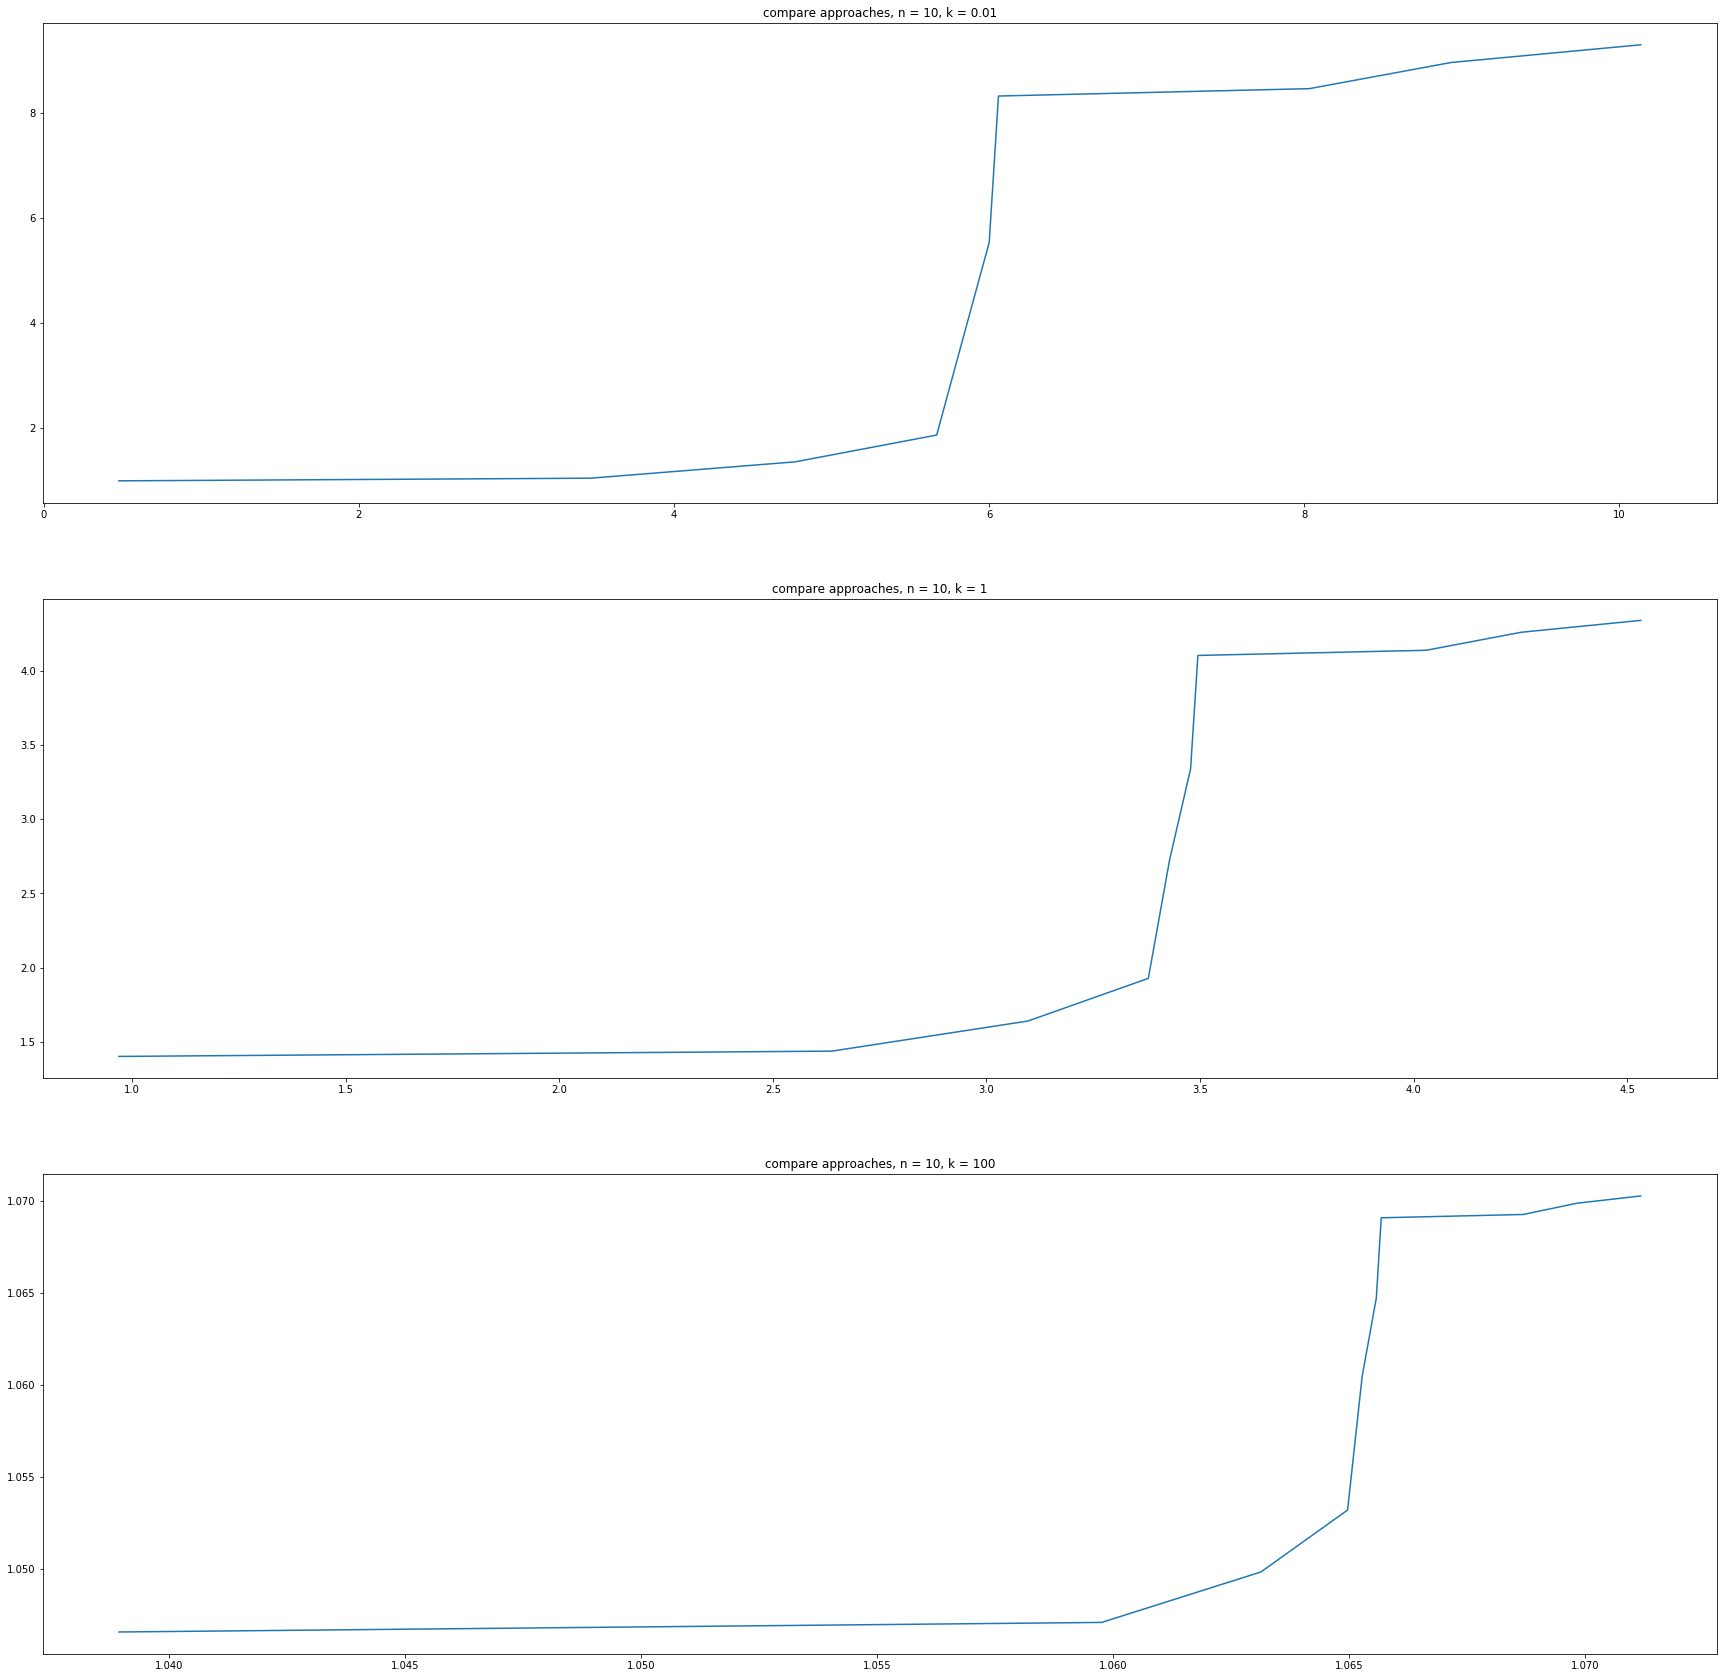

In [8]:
n = 10
m = 100
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(30,30))
for i, k in enumerate([1/m, 1, m]):
    jump_time_1 = npp_1(n, k, seed=42)
    jump_time_2 = npp_2(n, k, seed=42)

    ax[i].plot(jump_time_1, jump_time_2)
    ax[i].set_title(f"compare approaches, n = {n}, k = {k}")

fig.show()